In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.applications import ResNet50, Xception, InceptionResNetV2
from tensorflow.keras import layers
from keras.layers.normalization import BatchNormalization
import keras
import dlib
import cv2
from sklearn import preprocessing
from imutils import face_utils
import numpy as np
from keras.optimizers import SGD,Adam
from keras.layers import UpSampling2D
from tensorflow.keras import Model

from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from numpy.random import seed
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.applications import ResNet50, Xception, InceptionResNetV2
from tensorflow.keras import layers
from keras.layers.normalization import BatchNormalization
import keras
import dlib
import cv2
from sklearn import preprocessing
from imutils import face_utils
import numpy as np
from keras.optimizers import SGD,Adam
from keras.layers import UpSampling2D
from tensorflow.keras import Model

from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from numpy.random import seed
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
X_train = np.load('/content/drive/MyDrive/DATASETS/X_train_SFEW_48.npy')
y_train = np.load('/content/drive/MyDrive/DATASETS/y_train_SFEW_48.npy')

In [ ]:
X_test = np.load('/content/drive/MyDrive/DATASETS/X_test_SFEW_48.npy')
y_test = np.load('/content/drive/MyDrive/DATASETS/y_test_SFEW_48.npy')

2


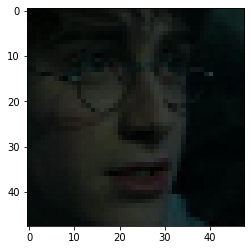

In [ ]:
import matplotlib.pyplot as plt
print(y_train[200])
##print(le.inverse_transform(y_train_KDEF[200]))
plt.imshow(X_train[200])
plt.show()

In [ ]:
x_train_data = X_train
print(x_train_data.shape)
y_train_data = to_categorical(y_train, 7)
print(y_train_data.shape)
x_test_data = X_test
print(x_test_data.shape)
y_test_data = to_categorical(y_test, 7)
print(y_test_data.shape)

(346, 48, 48, 3)
(346, 7)
(354, 48, 48, 3)
(354, 7)


In [ ]:
from sklearn.model_selection import train_test_split
x_train_final, x_valid_final, y_train_final, y_valid_final = train_test_split(x_train_data, y_train_data, test_size=0.05, random_state=42)

In [ ]:

# define the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))





model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(7, activation='softmax'))

In [ ]:

#sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#callbacks = [ModelCheckpoint(weights, monitor='val_loss', save_best_only=True, verbose=0)]
adam=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr = 1e-4), metrics=['accuracy'])

#model.fit(x_train_data,y_train_data,batch_size = 64,epochs=100)
history = model.fit(x_train_final , y_train_final, batch_size=64,epochs=300,validation_data=(x_valid_final, y_valid_final),verbose=1, use_multiprocessing=True)

#model.fit(X_train, Y_train, batch_size = 1000, nb_epoch = 5, verbose = 1, shuffle = True)


Epoch 1/300
6/6 [==============================] - 1s 59ms/step - loss: 1.9447 - accuracy: 0.1382 - val_loss: 1.9348 - val_accuracy: 0.2222
Epoch 2/300
6/6 [==============================] - 0s 22ms/step - loss: 1.9399 - accuracy: 0.1438 - val_loss: 1.9377 - val_accuracy: 0.2222
Epoch 3/300
6/6 [==============================] - 0s 22ms/step - loss: 1.9327 - accuracy: 0.1983 - val_loss: 1.9395 - val_accuracy: 0.2222
Epoch 4/300
6/6 [==============================] - 0s 21ms/step - loss: 1.9349 - accuracy: 0.1678 - val_loss: 1.9416 - val_accuracy: 0.1667
Epoch 5/300
6/6 [==============================] - 0s 23ms/step - loss: 1.9189 - accuracy: 0.1975 - val_loss: 1.9415 - val_accuracy: 0.1667
Epoch 6/300
6/6 [==============================] - 0s 22ms/step - loss: 1.9182 - accuracy: 0.2130 - val_loss: 1.9429 - val_accuracy: 0.2778
Epoch 7/300
6/6 [==============================] - 0s 22ms/step - loss: 1.9133 - accuracy: 0.2546 - val_loss: 1.9364 - val_accuracy: 0.2778
Epoch 8/300
6/6 [===

In [ ]:
import matplotlib.pyplot as plt             

def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))
    plt.subplot(221)
    plt.plot(history.history['accuracy'], label = "acc")
    plt.plot(history.history['val_accuracy'], label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.subplot(222)
    plt.plot(history.history['loss'] ,label = "loss")
    plt.plot(history.history['val_loss'], label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

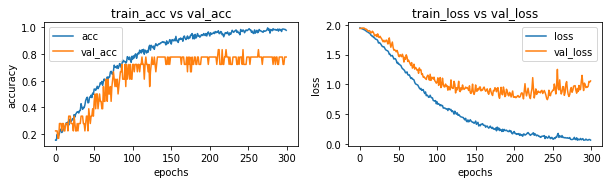

In [ ]:
plot_accuracy_loss(history)

In [ ]:
from sklearn.metrics import classification_report
from keras.models import Sequential, load_model

#model=load_model('/content/drive/MyDrive/DATASETS/test2_48.h5')
model.summary()
predicted = model.predict(X_test)
pred_labels = np.argmax(predicted, axis = 1)
report = classification_report(y_test, pred_labels)
print(report)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 4, 4, 128)        

In [ ]:
model.save('/content/drive/MyDrive/DATASETS/test_sfew_48.h5')